<a href="https://colab.research.google.com/github/kashir123/GBPUSD-final-project/blob/main/GBPUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/project')

In [ ]:
data = pd.read_csv("gbp_usd_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,0
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312,0
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912,0
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486,0
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499,0


In [ ]:
data = data.drop(columns=['Volume','Adj Close'])

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,2004-10-01,1.812908,1.813598,1.793400,1.799111
1,2004-10-04,1.797591,1.797785,1.782086,1.784312
2,2004-10-05,1.784312,1.787694,1.780912,1.782912
3,2004-10-06,1.782785,1.788493,1.775095,1.779486
4,2004-10-07,1.779486,1.784312,1.777493,1.782499


In [ ]:
data.describe()

,Open,High,Low,Close
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.518296,1.523915,1.512300,1.518320
std,0.237287,0.237954,0.237076,0.237310
min,1.072846,1.083541,0.637389,1.072754
25%,1.303586,1.307950,1.299195,1.303607
50%,1.517888,1.523926,1.511259,1.517957
75%,1.643554,1.648404,1.636909,1.643372
max,2.108415,2.115820,2.098812,2.108192


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
data.shape

(5200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5200 non-null   object 
 1   Open    5200 non-null   float64
 2   High    5200 non-null   float64
 3   Low     5200 non-null   float64
 4   Close   5200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 203.2+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5200 non-null   datetime64[ns]
 1   Open    5200 non-null   float64       
 2   High    5200 non-null   float64       
 3   Low     5200 non-null   float64       
 4   Close   5200 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 203.2 KB


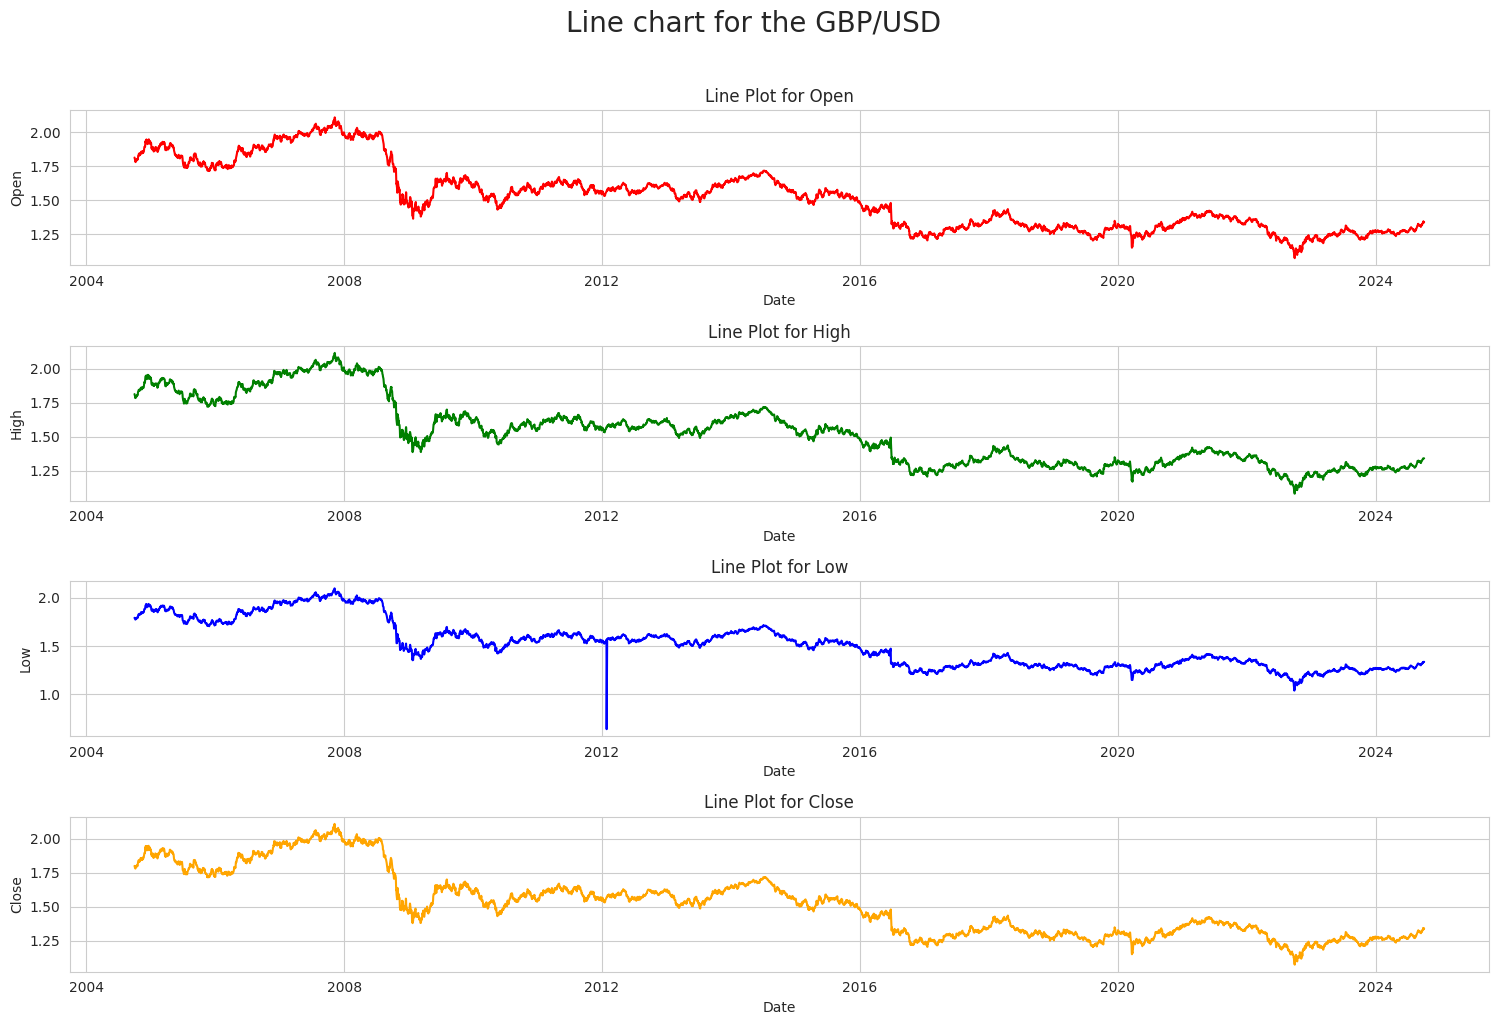

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(15,10))

col = ['Open', 'High', 'Low', 'Close']
colors = ['red','green','blue','orange']

for i,name in enumerate(col):
  sns.lineplot(data=data, x='Date', y=name, color=colors[i], ax=axs[i])
  axs[i].set_xlabel('Date')
  axs[i].set_ylabel(name)
  axs[i].set_title(f'Line Plot for {name}')
  sns.set_style('whitegrid')

plt.suptitle('Line chart for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

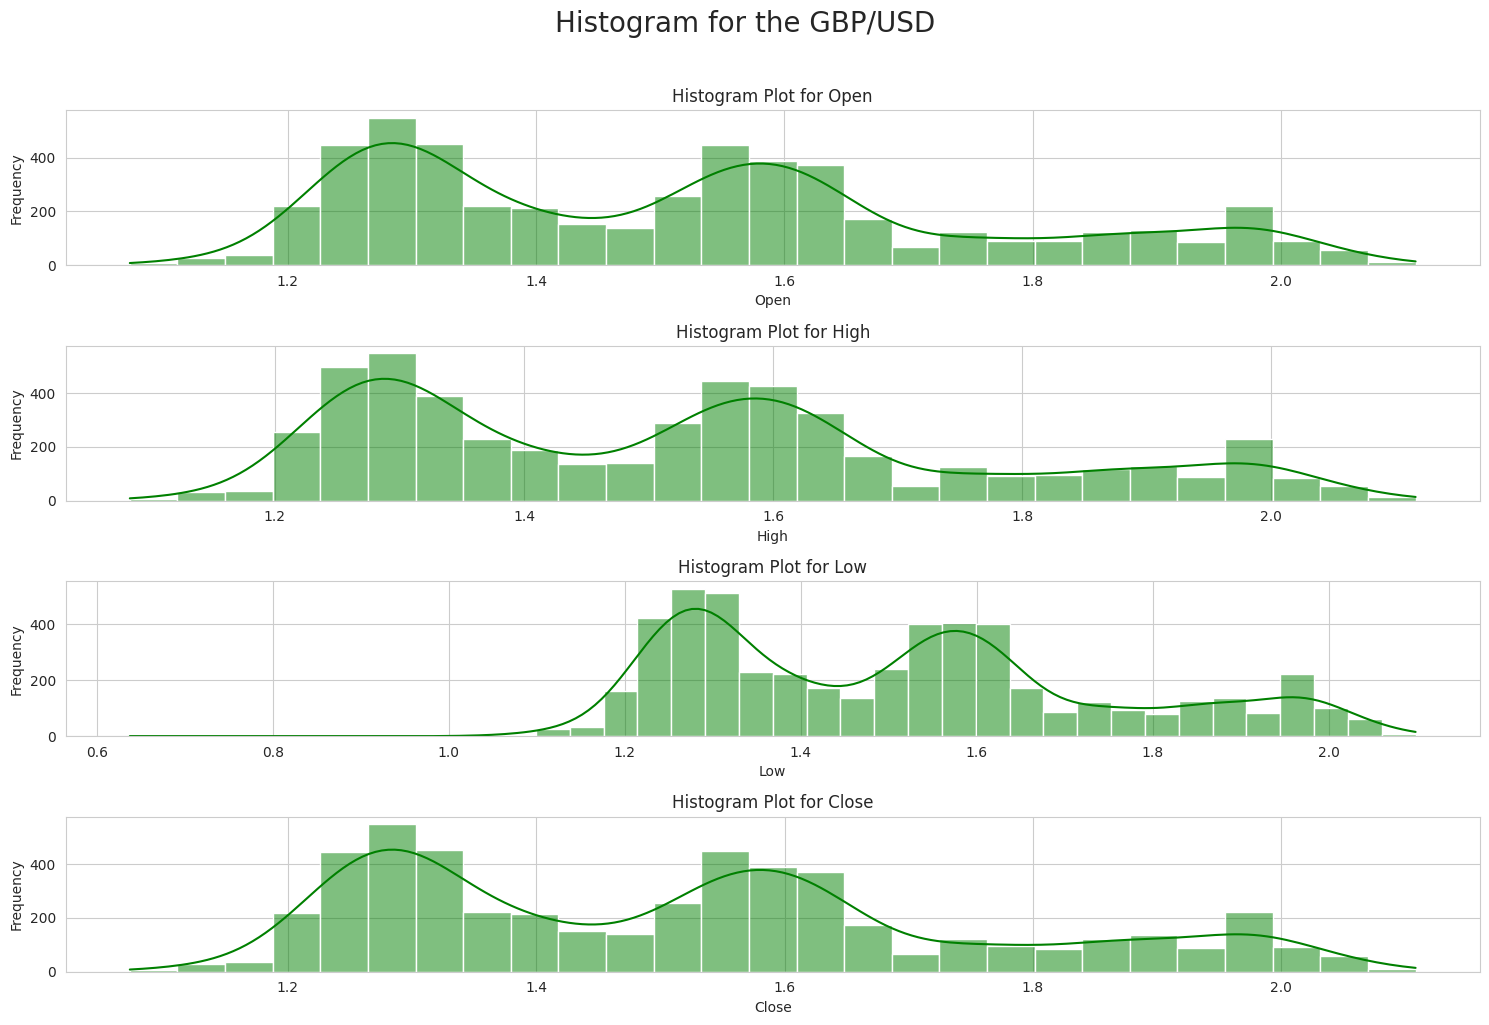

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(15,10))


for i,name in enumerate(col):
  sns.histplot(data=data[name],kde=True, color="green", ax=axs[i])
  axs[i].set_xlabel(name)
  axs[i].set_ylabel("Frequency")
  axs[i].set_title(f'Histogram Plot for {name}')

plt.suptitle('Histogram for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

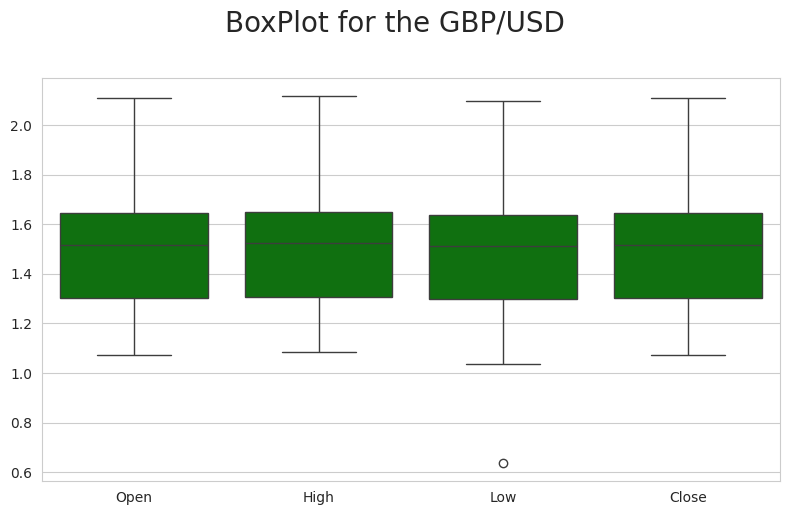

In [ ]:
plt.figure(figsize=(8,5))


sns.boxplot(data=data, color="green")

plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(dataset,columns):
  '''
  Remove the outliers from the dataset

  Parameters:
  dataset: contains the forex data
  columns: contains the columns of the dataset
  '''

  for column in columns:
    #calculate the 25%(Q1) and 75% (q3)
    first_quantile = dataset[column].quantile(0.25)
    third_quantile = dataset[column].quantile(0.75)

    inter_qunatile = third_quantile - first_quantile # interquantile range

    #define the bounds
    lower_bound = first_quantile - 1.5*inter_qunatile
    upper_bound = third_quantile + 1.5*inter_qunatile

    #remove the outliers
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

  return dataset


In [ ]:
data_cleaned = remove_outliers(data,col)

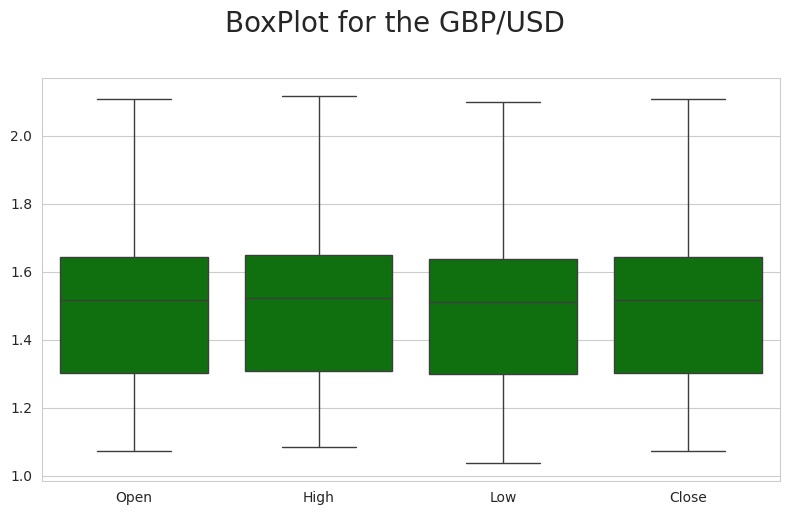

In [ ]:
#plot the box plot again to check outliers removed
plt.figure(figsize=(8,5))

#plot the boxplot
sns.boxplot(data=data_cleaned, color="green")


plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# **Techinal Indicators**

In [ ]:
def calculate_ema(data, period):
  '''
  Calculate the exponential moving average for the data

  parameter:
  data: contains the GBP/USD data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.ewm(span=period, adjust=False).mean()

data_cleaned['EMA5'] = calculate_ema(data_cleaned['Close'], 5)
data_cleaned['EMA10'] = calculate_ema(data_cleaned['Close'], 10)
data_cleaned['EMA20'] = calculate_ema(data_cleaned['Close'], 20)


In [ ]:
def calculate_sma(data, period):
  '''
  Calculate the simple moving average for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.rolling(window=period).mean()

data_cleaned['SMA5'] = calculate_sma(data_cleaned['Close'], 5)
data_cleaned['SMA10'] = calculate_sma(data_cleaned['Close'], 10)
data_cleaned['SMA20'] = calculate_sma(data_cleaned['Close'], 20)


In [ ]:
def calculate_rsi(data, period):
  '''
  Calculate the relative strength index for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  # difference in the prices
  diff_delta = data['Close'].diff()

  #gain
  gain = diff_delta.where(diff_delta > 0, 0)

  #loss
  loss = -diff_delta.where(diff_delta < 0, 0)

  # rolling average for the loss and gain
  average_gain = gain.rolling(window=period).mean()
  average_loss = loss.rolling(window=period).mean()

  # relative strength
  relative_strength = average_gain / average_loss

  # calculate RSI
  rsi = 100 - (100 / (1 + relative_strength))

  return rsi

data_cleaned['RSI12'] = calculate_rsi(data_cleaned, 12)
data_cleaned['RSI24'] = calculate_rsi(data_cleaned, 24)

In [ ]:
def calculate_macd(data):
  '''
  Calculate the moving average convergence divergence (MACD), signal
  line and MACD histogram for the data

  parameter:
  data: contains the forex data

  return: multiple series (MACD, Macd histogram, signal line)
  '''
  # calculate the 12 and 26 ema
  ema12 = data['Close'].ewm(span=12, adjust=False).mean()
  ema26 = data['Close'].ewm(span=26, adjust=False).mean()
  # calculate the MACD
  macd = ema12 - ema26

  # calculate the signal line
  signal_line = macd.ewm(span=9, adjust=False).mean()

  # calculate the MACD histogram
  macd_histogram = macd - signal_line

  return macd, macd_histogram, signal_line

data_cleaned['MACD'], data_cleaned['MACD_Histogram'], data_cleaned['Signal_line'] = calculate_macd(data_cleaned)


In [ ]:
def calculate_bollinger(data, sma20):
  '''
  Calculate the bollinger bands for the data

  parameter:
  data: contains the forex data
  sma20: contains the simple moving average of 20 days

  return: multiple series (bollinger bands)
  '''
  std = sma20.rolling(window=20).std()
  upper_band = sma20 + (std * 2)
  lower_band = sma20 - (std * 2)

  return upper_band, lower_band

data_cleaned['BB_Upper_band'], data_cleaned['BB_Lower_band'] = calculate_bollinger(data_cleaned, data_cleaned['SMA20'])

In [ ]:
data_cleaned.tail(20)

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
5180,2024-09-03,1.314112,1.314752,1.309003,1.314199,1.315303,1.311997,1.304072,1.317758,1.315189,1.298228,74.261062,63.310897,0.009564,0.001343,0.008221,1.308052,1.288403
5181,2024-09-04,1.311355,1.317488,1.310238,1.311407,1.314004,1.311890,1.304770,1.314889,1.315976,1.300374,65.970985,61.271266,0.008951,0.000584,0.008367,1.311822,1.288927
5182,2024-09-05,1.314475,1.318809,1.313888,1.314475,1.314161,1.312360,1.305695,1.313911,1.316488,1.302696,65.134186,69.539068,0.008613,0.000197,0.008416,1.315909,1.289484
5183,2024-09-06,1.317731,1.323434,1.312991,1.317749,1.315357,1.313340,1.306843,1.314136,1.317286,1.304846,64.272061,68.770453,0.008512,0.000077,0.008435,1.319839,1.289854
5184,2024-09-09,1.313232,1.314389,1.307155,1.313336,1.314683,1.313339,1.307461,1.314233,1.316493,1.306761,54.123236,65.939506,0.007983,-0.000362,0.008345,1.323423,1.290099
5185,2024-09-10,1.306984,1.310753,1.304989,1.307138,1.312168,1.312211,1.307430,1.312821,1.315289,1.308262,47.565349,68.605406,0.006984,-0.001089,0.008073,1.326358,1.290166
5186,2024-09-11,1.308216,1.311166,1.300323,1.308027,1.310788,1.311451,1.307487,1.312145,1.313517,1.309330,34.798975,69.158440,0.006192,-0.001505,0.007697,1.328563,1.290097
5187,2024-09-12,1.303917,1.308387,1.303271,1.303951,1.308509,1.310087,1.307150,1.310040,1.311976,1.310384,33.282015,64.353694,0.005176,-0.002016,0.007193,1.330405,1.290363
5188,2024-09-13,1.313318,1.315686,1.311648,1.313232,1.310083,1.310659,1.307730,1.309137,1.311637,1.311748,37.023874,67.247485,0.005061,-0.001705,0.006766,1.332281,1.291215
5189,2024-09-16,1.313594,1.321388,1.313594,1.313800,1.311322,1.311230,1.308308,1.309230,1.311731,1.312702,43.439172,66.792602,0.004959,-0.001446,0.006405,1.333447,1.291958
